This is a garment industry and it is one of the most dominating industries in this era of industrial globalization. It is a highly labor-intensive industry that requires a large number of human resources to produce its goods and fill up the global demand for garment products. Because of the dependency on human labor, the production of a garment company comprehensively relies on the productivity of the employees who are working in different departments of the company. A common problem in this industry is that the actual productivity of the garment employees sometimes does not meet the targeted productivity that was set for them by the authorities to meet the production goals in due time. When the productivity gap occurs, the company faces a huge loss in production

**Project Aim:** This project aims at predicting the productivity performance of the employees in their factories thereby helping  the manufacturers to set an accurate target, minimize the production loss and maximize the profit. 

#### __Metric__

Image Source: The page for this competition on aiPlanet

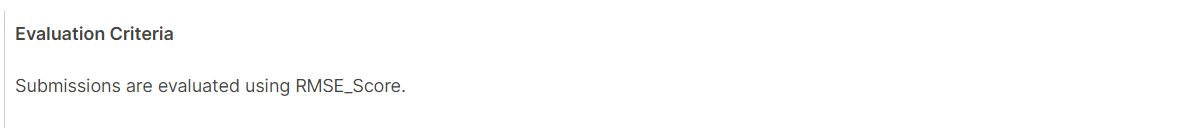



**DATASET DESCRIPTION**

NOTE: The train and test dataset was provided separeatly by the challege organiser.

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

day : Day of the Week

quarter : A portion of the month. A month was divided into four quarters

department : Associated department with the instance

team_no : Associated team number with the instance

no_of_workers : Number of workers in each team

no_of_style_change : Number of changes in the style of a particular product

targeted_productivity : Targeted productivity set by the Authority for each team for each day.

smv : Standard Minute Value, it is the allocated time for a task

wip : Work in progress. Includes the number of unfinished items for products

over_time : Represents the amount of overtime by each team in minutes

incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

idle_time : The amount of time when the production was interrupted due to several reasons

idle_men : The number of workers who were idle due to production interruption

actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

**Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None) # To display all the columns in the datasets.
%matplotlib inline

**loading In The Train and Test Dataset**

In [2]:
train_data = pd.read_csv("/content/train_dataset.csv")
test_data = pd.read_csv("/content/test_dataset.csv")

**Getting To Know The Dataset**

In [3]:
train_data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0.790003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,9,0.80,29.12,14.0,6960,0,0.0,0,0,58.0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0.497885
1013,9,0.75,29.12,1070.0,6960,34,0.0,0,0,58.0,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.750593
1014,4,0.80,30.10,891.0,7140,38,0.0,0,1,59.0,2,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0.800137
1015,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.900130


In [4]:
test_data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,12,0.75,4.08,NaN,1080,0,0.0,0,0,9.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,4,0.75,4.15,NaN,2400,0,0.0,0,0,20.0,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,3,0.70,30.10,1057.0,0,40,0.0,0,1,58.0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,7,0.70,3.94,NaN,2160,0,0.0,0,0,18.0,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,5,0.50,4.15,NaN,1440,0,0.0,0,0,8.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,1
176,6,0.50,23.41,1379.0,2280,0,0.0,0,1,39.0,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0
177,5,0.50,26.82,711.0,7080,23,0.0,0,1,59.0,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0
178,5,0.80,11.61,659.0,7080,50,0.0,0,0,31.5,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [5]:
train_data.shape

(1017, 26)

In [6]:
test_data.shape

(180, 25)

We can see that the train data is is 5 times the test dataset.

In [7]:
train_data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.000000,1017.000000,1017.000000,594.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.443461,0.730747,15.150492,1183.183502,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,1.722714,0.293019,0.292035,0.170108,0.208456,0.036382,0.201573,0.214356,0.584071,0.161259,0.152409,0.164208,0.165192,0.171091,0.185841,0.736509
std,3.472473,0.097384,10.946096,1793.836719,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,0.736964,0.455371,0.454922,0.375913,0.406405,0.187330,0.401373,0.410577,0.493124,0.367950,0.359594,0.370647,0.371536,0.376774,0.389169,0.174304
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,3.000000,0.700000,3.940000,770.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651515
50%,7.000000,0.750000,15.260000,1039.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,9.000000,0.800000,24.260000,1254.750000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850170
max,12.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.108125


In [8]:
test_data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
count,180.000000,180.000000,180.000000,97.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,6.333333,0.723333,14.563167,1235.061856,4762.500000,24.205556,1.666667,0.205556,0.094444,33.27500,1.733333,0.344444,0.211111,0.205556,0.200000,0.038889,0.244444,0.216667,0.538889,0.194444,0.177778,0.200000,0.172222,0.150000,0.105556
std,3.423546,0.100751,10.943990,2094.627651,3737.737773,29.280515,22.360680,2.757817,0.345720,22.28236,0.788181,0.476512,0.409235,0.405234,0.401116,0.193869,0.430956,0.413123,0.499876,0.396876,0.383392,0.401116,0.378627,0.358067,0.308125
min,1.000000,0.350000,2.900000,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.700000,4.080000,808.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.750000,14.990000,1067.000000,3600.000000,0.000000,0.000000,0.000000,0.000000,33.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.800000,23.057500,1227.000000,7020.000000,46.250000,0.000000,0.000000,0.000000,57.00000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,0.800000,48.680000,21385.000000,25920.000000,113.000000,300.000000,37.000000,2.000000,59.00000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


from the above, we get to see the ditribution of the dataset. Since the mean and the median are not that far from each other. Therefore the distribution is not a normal one.

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   180 non-null    int64  
 1   targeted_productivity  180 non-null    float64
 2   smv                    180 non-null    float64
 3   wip                    97 non-null     float64
 4   over_time              180 non-null    int64  
 5   incentive              180 non-null    int64  
 6   idle_time              180 non-null    float64
 7   idle_men               180 non-null    int64  
 8   no_of_style_change     180 non-null    int64  
 9   no_of_workers          180 non-null    float64
 10  month                  180 non-null    int64  
 11  quarter_Quarter1       180 non-null    int64  
 12  quarter_Quarter2       180 non-null    int64  
 13  quarter_Quarter3       180 non-null    int64  
 14  quarter_Quarter4       180 non-null    int64  
 15  quarte

We can see from both the train and test data info that only the **wip** column has missing values and the missing values is more tha half of the dataset.

**Data Cleaning**

before we proceed to cleaning the dataste, we need to make more further ivestigation on the column and the target variable.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


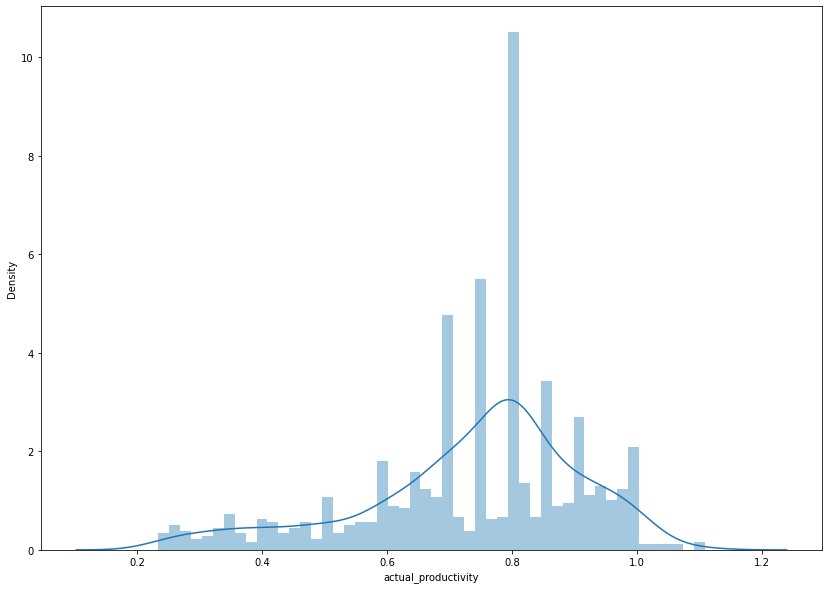

In [11]:
plt.figure(figsize=(14, 10))
sb.distplot(train_data["actual_productivity"], bins = 50)

We can see from the above that the label column column is not normally distributed and it is left skeewed. The average actual productiviry of all the employees is 0.8%

In [12]:
train_data[train_data["wip"].isna()][train_data["smv"]<11]

<ipython-input-12-b08a5a86ee13>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_data[train_data["wip"].isna()][train_data["smv"]<11]


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.755167
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.820833
5,3,0.75,4.15,NaN,1920,0,0.0,0,0,8.0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0.875391
7,6,0.70,2.90,NaN,960,0,0.0,0,0,8.0,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.942500
10,3,0.80,4.60,NaN,6300,0,0.0,0,0,15.0,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0.921704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2,0.80,3.94,NaN,1440,0,0.0,0,0,8.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.835758
1003,11,0.80,4.15,NaN,900,0,0.0,0,0,5.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.515606
1004,10,0.80,3.94,NaN,960,0,0.0,0,0,8.0,2,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0.385792
1008,4,0.70,4.15,NaN,1800,0,0.0,0,0,15.0,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1.096633


it is noticed from the train dataset that most of the missing values in the wip column are the row with very low smv of less than 10. So, we need to fill the NaN rows with the median of the column seeing that the distribution of the target column is not normal.

Putting into consideration that the ditribution of the dataste is not perfectly normal, it isbest for us to fill the missig values with te median of wip column. both for the train and test dataset.

In [13]:
#replacing the missing value in oth the train and test data
	
train_data.wip.fillna(train_data.wip.median(), inplace= True)
test_data.wip.fillna(test_data.wip.median(), inplace= True)

 After replacig the missig data, we need to have a sense of the relationship between numeric variables and our target variable

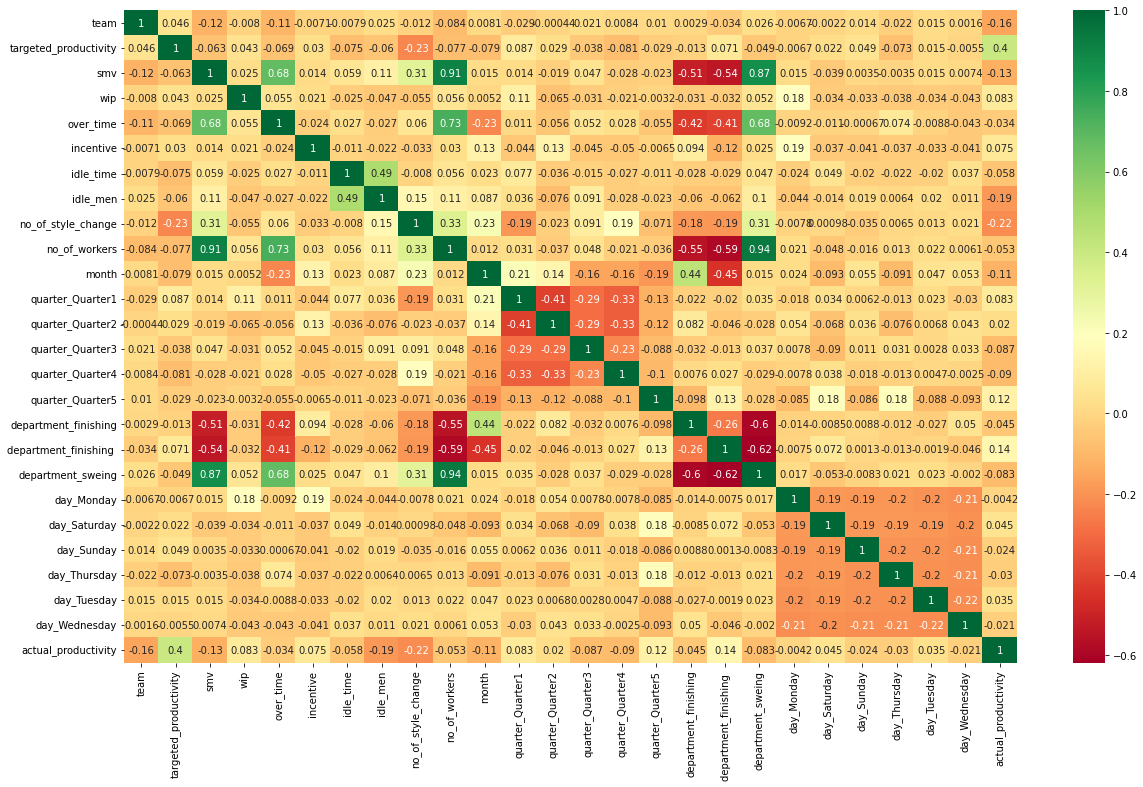

In [14]:
plt.figure(figsize=(20,12))
sb.heatmap(train_data.corr(), annot=True, cmap= "RdYlGn")

In [15]:
data_corr=train_data.corr()
data_corr['actual_productivity'].sort_values(ascending=False)

actual_productivity      1.000000
targeted_productivity    0.401069
department_finishing     0.143885
quarter_Quarter5         0.119284
wip                      0.082943
quarter_Quarter1         0.082608
incentive                0.074926
day_Saturday             0.045212
day_Tuesday              0.035301
quarter_Quarter2         0.020185
day_Monday              -0.004186
day_Wednesday           -0.020523
day_Sunday              -0.024243
day_Thursday            -0.029730
over_time               -0.033712
department_finishing    -0.045173
no_of_workers           -0.053273
idle_time               -0.058365
department_sweing       -0.083030
quarter_Quarter3        -0.086748
quarter_Quarter4        -0.089900
month                   -0.113675
smv                     -0.126243
team                    -0.155700
idle_men                -0.186789
no_of_style_change      -0.217396
Name: actual_productivity, dtype: float64

from the above correlation, we can see that the correlatio betwee the features ad the traget column is not high. although there are some columns that have correlation with each other and these are, 

1.   SMV and Department_sewing
2.   SMV and no_of_workers
3.   SMV and overtime
4.   Overtime and sewing
5.   Overtime and no_of workers
6.  actual_productivity and targeted_productivity




**Data Preprocessing**

In [16]:
train_data.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'actual_productivity'],
      dtype='object')

we need to separate the dataset into x  and y 

In [17]:
X = train_data.drop(["actual_productivity"], axis = 1 )

In [18]:
X

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,9,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,3,0.80,4.15,1039.0,1440,0,0.0,0,0,7.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,9,0.80,29.12,14.0,6960,0,0.0,0,0,58.0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1013,9,0.75,29.12,1070.0,6960,34,0.0,0,0,58.0,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1014,4,0.80,30.10,891.0,7140,38,0.0,0,1,59.0,2,0,0,0,1,0,0,0,1,1,0,0,0,0,0
1015,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [19]:
y = train_data.actual_productivity
y.head(5)

0    0.755167
1    0.535678
2    0.820833
3    0.581131
4    0.790003
Name: actual_productivity, dtype: float64

we need to divide the train dataset into train and validation

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

we need to rescale the datset using MinMax SCaler

In [21]:
X_train.shape

(813, 25)

In [22]:
y_train.shape

(813,)

In [23]:
X_val.shape

(204, 25)

the next step is to rescale the features

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_validation = scaler.fit_transform(X_val)

**Model Training**

In [26]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [27]:
rf_model = RandomForestRegressor(random_state= 42)
xgb_model = XGBRegressor(random_state = 42)
ad_model = AdaBoostRegressor(random_state= 42)
kn_model = KNeighborsRegressor()

models = [ rf_model, xgb_model, ad_model, kn_model]

for model in models:
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  pred_val = model.predict(X_validation)
  print(f"The score for {model} is {train_score}, \n")

The score for RandomForestRegressor(random_state=42) is 0.9318784618433649, 

[18:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The score for XGBRegressor(random_state=42) is 0.703334033595851, 

The score for AdaBoostRegressor(random_state=42) is 0.4688885591380434, 

The score for KNeighborsRegressor() is 0.33072494536355157, 



From the above, we can see that RnadomForest gave us the higest accuracy, next to XGBRegressor

In [28]:

y_rf_prediction = rf_model.predict(X_validation)
y_xgb_prediction = xgb_model.predict(X_validation)

In [29]:
y_rf_prediction.shape

(204,)

In [30]:
from sklearn.metrics import accuracy_score   
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_rf = sqrt(mean_squared_error(y_val, y_rf_prediction))
rms_xgb = sqrt(mean_squared_error(y_val, y_xgb_prediction))

In [31]:
print(rms_rf)
print(rms_xgb)

0.17594385201145205
0.17282998906551233


the resultwe have is looking good. so, there is o need for hyperparameter tuning for this. so, we will go with the Xgbooster since it gives us he best result

In [91]:
new_prediction = (xgb_model.predict(test_data.values))

In [97]:
new_prediction 

array([0.4651624 , 0.35125744, 0.68834037, 0.4126624 , 0.33220056,
       0.65322506, 0.61925524, 0.4126624 , 0.6315988 , 0.4069593 ,
       0.3700654 , 0.65258944, 0.5953398 , 0.29099077, 0.29546925,
       0.36078823, 0.35481042, 0.6050988 , 0.56911194, 0.6001487 ,
       0.62634885, 0.33711648, 0.33711648, 0.624105  , 0.5926549 ,
       0.5953398 , 0.4069593 , 0.38071865, 0.3131816 , 0.65034556,
       0.34564483, 0.59532034, 0.36517128, 0.58160573, 0.6552743 ,
       0.28616124, 0.4034491 , 0.65034556, 0.4047892 , 0.62634885,
       0.3348559 , 0.33711648, 0.65258944, 0.60371304, 0.6108066 ,
       0.33711648, 0.56911194, 0.70893645, 0.3633572 , 0.576756  ,
       0.62634885, 0.43934548, 0.43664247, 0.32157427, 0.36517128,
       0.3633572 , 0.576756  , 0.6794657 , 0.65258944, 0.32987094,
       0.6600833 , 0.35626358, 0.37232602, 0.34781492, 0.38071865,
       0.61925524, 0.61925524, 0.35461363, 0.42250156, 0.4047892 ,
       0.61925524, 0.65034556, 0.491403  , 0.624105  , 0.32945

In [92]:
predictionss = pd.DataFrame()

In [94]:
predictionss["actual_productivity"] = new_prediction

In [95]:
predictionss

,actual_productivity
0,0.465162
1,0.351257
2,0.688340
3,0.412662
4,0.332201
...,...
175,0.634803
176,0.260550
177,0.576606
178,0.652589


In [96]:
from google.colab import files

predictionss.to_csv('employeesubmission.csv', index = False)
files.download('employeesubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>